In [26]:
#Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Enable inline plots
%matplotlib inline

In [3]:
#Import the streamflow data CSV and format columns
df=pd.read_csv('GageData.csv',dtype={'site_no':'str'},parse_dates=['datetime'])

In [4]:
#Add year, month, and water_year columns
df['year'] = df['datetime'].map(lambda x: x.year)
df['month'] = df['datetime'].map(lambda x: x.month)
df['water_year'] = df['datetime'].apply(lambda x: x.year if x.month >= 10 else x.year - 1)

In [5]:
#Compute flow in cms
df['MeanFlow_cms'] = df['MeanFlow_cfs'] * 0.028316847 

In [6]:
#Set the index to full date
df.index = df.datetime

In [7]:
#Create data slices for pre- and post-Falls Lake
dfPre = df[:'1980-01-01']
dfPost = df['1983-12-31':]

### Compute max annual flow
Compute max annual flow from our daily flow data

In [8]:
df.sort_values(by='MeanFlow_cms',ascending=False).head()

,agency_cd,site_no,datetime,MeanFlow_cfs,Confidence,year,month,water_year,MeanFlow_cms
datetime,,,,,,,,,
1945-09-19,USGS,02087500,1945-09-19,22500.0,A,1945,9,1944,637.129057
1945-09-18,USGS,02087500,1945-09-18,19800.0,A,1945,9,1944,560.673571
1999-09-17,USGS,02087500,1999-09-17,19700.0,A,1999,9,1998,557.841886
1945-09-20,USGS,02087500,1945-09-20,19600.0,A,1945,9,1944,555.010201
1996-09-07,USGS,02087500,1996-09-07,18900.0,A,1996,9,1995,535.188408


In [9]:
#Group data on water_year
byYear = df.groupby('water_year')
dfMaxAnnual = byYear['MeanFlow_cms'].max()
dfMaxAnnual.head()

water_year
1930    300.158578
1931    264.762519
1932    212.376352
1933    237.861515
1934    461.564606
Name: MeanFlow_cms, dtype: float64

In [10]:
#Covert to a dataframe
dfMA = pd.DataFrame(dfMaxAnnual)

In [11]:
dfMA.head()

,MeanFlow_cms
water_year,
1930,300.158578
1931,264.762519
1932,212.376352
1933,237.861515
1934,461.564606


In [12]:
### Compute rankings
dfMA['rank'] = dfMA.rank(ascending=False)
dfMA.sort_values(by='MeanFlow_cms',ascending=False,inplace=True)
dfMA.head()

,MeanFlow_cms,rank
water_year,,
1944,637.129057,1.0
1998,557.841886,2.0
1995,535.188408,3.0
2016,532.356724,4.0
1934,461.564606,5.0


In [13]:
# Compute Return intervale
countRecs = dfMA['rank'].max()
dfMA['RI'] = (countRecs + 1) / dfMA['rank']

In [14]:
# Compute probability of recurrence (POR)
dfMA['Pe'] = 1 / dfMA['RI']
dfMA.head()

,MeanFlow_cms,rank,RI,Pe
water_year,,,,
1944,637.129057,1.0,88.000000,0.011364
1998,557.841886,2.0,44.000000,0.022727
1995,535.188408,3.0,29.333333,0.034091
2016,532.356724,4.0,22.000000,0.045455
1934,461.564606,5.0,17.600000,0.056818


y=118.000954x+(128.192589)


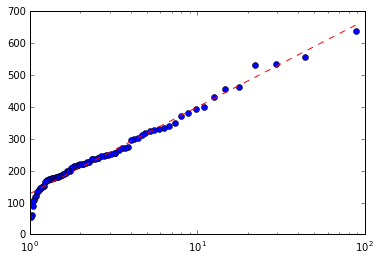

In [68]:
#Plot and add a trendline
x = dfMA['RI']
y = dfMA['MeanFlow_cms']

logx = np.log(x)

#Create the plot objects
plt.semilogx(x,y,'o');

# calc the trendline
z = np.polyfit(logx, y, 1)
p = np.poly1d(z)
plt.plot(x,p(logx),"r--")

# the line equation:
print ("y=%.6fx+(%.6f)"%(z[0],z[1]))


#### Apply the formula to compute 100, 500, and 1000 year floods

In [55]:
#Create a series of three objects, using the years as the index 
df = pd.Series(0.0,index=[100,500,1000])
df

100     0.0
500     0.0
1000    0.0
dtype: float64

In [56]:
#Apply the formula to compute 100, 500, and 1000 year floods
y100 = z[0] * 100 + z[1]
y500 = z[0] * 500 + z[1]
y1k = z[0] * 1000 + z[1]

In [57]:
#Create a data frame of the values
sFloodYears = pd.Series([100,500,1000])
sFloodVals = z[0] * sFloodYears + z[1]
